In [6]:
#Importing the libraries

from numpy import mean
from numpy import std #standard deviation 
from matplotlib import pyplot #plot accuracy + loss curves
from sklearn.model_selection import KFold
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD 

In [7]:
#Load train and test dataset

def load_dataset():
  #X = pixel values, Y = labels
  (trainX, trainY), (testX, testY) = mnist.load_data()

  #reshape the data
    #(60,000, 28, 28) -> original shape
    #(60,000, 28, 28, 1) -> desired shape
  trainX = trainX.reshape((-1, 28, 28, 1)) #-1 collects all 60,000

    #(0,1,2,3,4,5,6,7,8,9) -> original labels
    
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return trainX, trainY, testX, testY

In [8]:
#Standardization (scaling the features/pixels)

def prep_pixels(train, test):
   #convert orig datasets into float 
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')

  train_norm = train_norm / 255.0 #255 is the highest value a pixel can have
  test_norm = test_norm / 255.0
  return train_norm, test_norm

In [9]:
#Define the architecture
def define_model():
  #define the model
  model = Sequential()
  #32 = num of filters
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  
  #compile the model
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [12]:
#Evaluate the modle using K-Fold CV

def evaluate_model(dataX, dataY, n_fold = 5):
  scores, histories = list(), list()
  # n_folds = num of folds we're using , shuffle = boolean, random_state
  #n_folds means that for 10 iterations, each section will be used for training 9 times and testing 1 time
  kfold = KFold(n_fold, shuffle = True, random_state = 1)
  for train_ix, test_ix in kfold.split(dataX):
    model = define_model()
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    history = model.fit(trainX, trainY, epochs = 10, batch_size = 32, validation_data = (testX, testY), verbose = 0)
    _, acc = model.evaluate(testX, testY, verbose = 0)
    print('>%.3f' %(acc * 100))
    scores.append(acc)
    histories.append(history)
    return scores, histories

In [5]:
#Plot the curves

def summarize_diagnostics(histories):
  for i in range(len(histories)):
    pyplot.subplot(2, 1, 1)
    pyplot.title ('Cross Entropy Loss')
    pyplot.plot(histories[i].history['loss'], color = 'blue', label = 'train')
    pyplot.plot(histories[i].history['val_loss'], color = 'orange', label = 'test')
    pyplot.subplot(2, 1, 2) #second plot we will show
    pyplot.title ('Classification Accuracy')
    pyplot.plot(histories[i].history['accuracy'], color = 'blue', label = 'train')
    pyplot.plot(histories[i].history['val_accuracy'], color = 'orange', label = 'test')
    pyplot.show()


In [4]:
#Summarize model performance

def summarize_performance(scores):
  #print results
  print('Accuracy: mean = %0.3f, std = %0.3f, n = %d' %(mean(scores * 100), std(scores) * 100, len(scores)* 100))
  pyplot.boxplot(scores)
  pyplot.show()

In [3]:
#Run the test harness for evaluating the model

def run_test_harness():
  #call previous functions
  trainX, trainY, testX, testY = load_dataset()
  trainX, testX = prep_pixels(trainX, testX)
  scores, histories = evaluate_model(trainX, trainY)
  summarize_diagnostics(histories)
  summarize_performance(scores)

>98.525


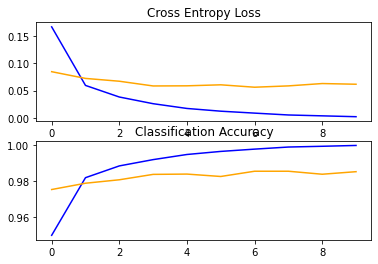

Accuracy: mean = 0.985, std = 0.000, n = 100


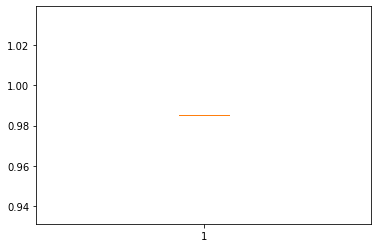

In [13]:
#Run the test harness function - actually running the model

run_test_harness()